# Szakdolgozatommal kapcsolatos eredmények megjelenítése

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
%matplotlib inline

### Állítsuk be a patht, ahol a .txt fájlok találhatók

In [14]:
path = 'E:/egyetem/msc szakdoga/szimulaciok'


### Néhány függvény mely segítenek beolvasni az olyan fájlokat, melyek csúcsszámnyi adatot tartalmaznak a gráfról, ilyen a fokszámeloszlás, illetve a klaszterezettségnél vizsgált C(k) mennyiség

In [151]:
def getDistMean(file):
    with open(file) as f:
        lines = f.read().splitlines()
    n = len(lines[0].split())
    T = len(lines)
    
    dists = [[-1]*n for _ in range(T)]
    for i in range(len(lines)):
        dists[i] = list(map(int,lines[i].split()))

    distMean =[0]*n
    for i in range(T):
        for j in range(n):
            distMean[j]+=dists[i][j]/T
    return distMean

def getDistMeanFloat(file):
    with open(file) as f:
        lines = f.read().splitlines()
    n = len(lines[0].split())

    dists = [[-1]*n for _ in range(10)]
    for i in range(len(lines)):
        dists[i] = list(map(float,lines[i].split()))

    distMean =[0]*n
    for i in range(10):
        for j in range(n):
            distMean[j]+=dists[i][j]/10
    return distMean



def getElmeletiDist(n,m,delta):
    #delta = 0
    #m=2
    p = [0]*(150-m)
    for k in range(2,150):
        p[k-2] = n*(2+delta/m)*math.gamma(k+delta)/math.gamma(k+3+delta+delta/m)*math.gamma(m+2+delta+delta/m)/math.gamma(m+delta)
    return p


# olyan mennyiségek vizsgálatára, mikor egy gráfhoz egyetlen mennyiség tartozik
def getOneData(file):
    with open(file) as f:
        lines = f.read().splitlines()
    return list(map(float,lines[0].split()))


### Nézzünk egy példát, hogyan tudjuk a fokszámeloszlást megjeleníteni a GPA modellben különböző r paraméterválasztás esetén (F = F1)

In [15]:
distMean_002 = getDistMean(path+'/GPA1/degreeDist_10000_5_0.02_0.txt') 
distMean_004 = getDistMean(path+'/GPA1/degreeDist_10000_5_0.04_0.txt') 
distMean_006 = getDistMean(path+'/GPA1/degreeDist_10000_5_0.06_0.txt') 
distMean_008 = getDistMean(path+'/GPA1/degreeDist_10000_5_0.08_0.txt') 
distMean_010 = getDistMean(path+'/GPA1/degreeDist_10000_5_0.1_0.txt') 
distMean_020 = getDistMean(path+'/GPA1/degreeDist_10000_5_0.2_0.txt') 
distMean_050 = getDistMean(path+'/GPA1/degreeDist_10000_5_0.5_0.txt') 
distMean_100 = getDistMean(path+'/GPA1/degreeDist_10000_5_1_0.txt') 

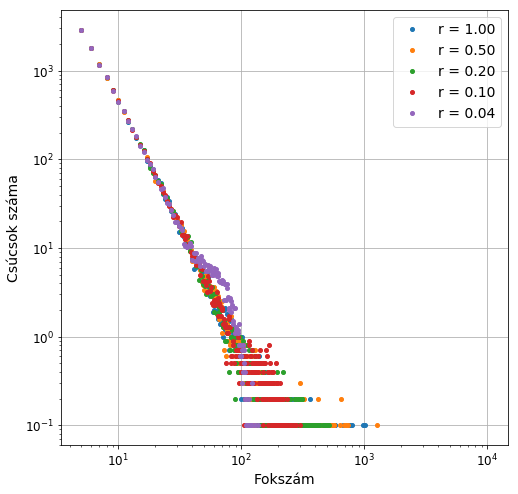

In [12]:
plt.figure(figsize=(8,8))
sz = 8
plt.loglog(range(10000)[5:],distMean_100[5:],'.',label='r = 1.00',markersize=sz)
plt.loglog(range(10000)[5:],distMean_050[5:],'.',label='r = 0.50',markersize=sz)
plt.loglog(range(10000)[5:],distMean_020[5:],'.',label='r = 0.20',markersize=sz)
plt.loglog(range(10000)[5:],distMean_010[5:],'.',label='r = 0.10',markersize=sz)
#plt.loglog(range(10000)[5:],distMean_008[5:],'.',label='r = 0.08',markersize=sz)
#plt.loglog(range(10000)[5:],distMean_006[5:],'.',label='r = 0.06',markersize=sz)
plt.loglog(range(10000)[5:],distMean_004[5:],'.',label='r = 0.04',markersize=sz)
#plt.loglog(range(10000)[5:],distMean_002[5:],'.',label='r = 0.02',markersize=sz)

plt.legend(loc='best',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("Csúcsok száma",fontsize = 14)

plt.grid(True)
plt.show()

### A következő példa GPA hálózat fokszámeloszlását mutatja különböző beta érték esetén (F=F2)

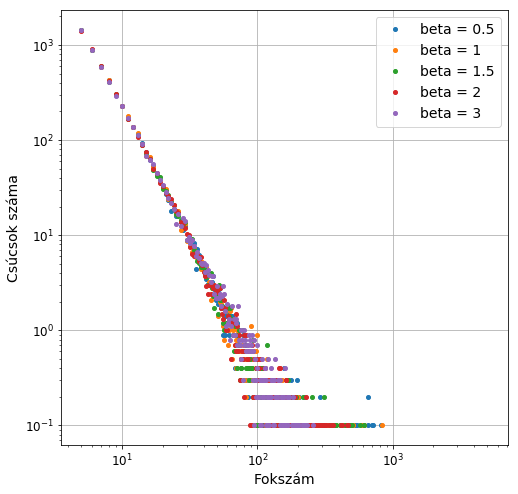

In [16]:
betafok_05 = getDistMean(path + '/GPA2/degreeDist_5000_5_0.5_0_0.txt') 
betafok_1 = getDistMean(path + '/GPA2/degreeDist_5000_5_1_0_0.txt') 
betafok_15 = getDistMean(path + '/GPA2/degreeDist_5000_5_1.5_0_0.txt') 
betafok_2 = getDistMean(path + '/GPA2/degreeDist_5000_5_2_0_0.txt')
betafok_3 = getDistMean(path + '/GPA2/degreeDist_5000_5_3_0_0.txt')


plt.figure(figsize=(8,8))
sz = 8
plt.loglog(range(5000)[5:],betafok_05[5:],'.',label='beta = 0.5',markersize=sz)
plt.loglog(range(5000)[5:],betafok_1[5:],'.',label='beta = 1',markersize=sz)
plt.loglog(range(5000)[5:],betafok_15[5:],'.',label='beta = 1.5',markersize=sz)
plt.loglog(range(5000)[5:],betafok_2[5:],'.',label='beta = 2',markersize=sz)
plt.loglog(range(5000)[5:],betafok_3[5:],'.',label='beta = 3',markersize=sz)

plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("Csúcsok száma",fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best',fontsize=14)

plt.grid(True)
plt.show()


### Példa PA modell fokszámeloszlásának viselkedésére különböző delta paraméterek mellett

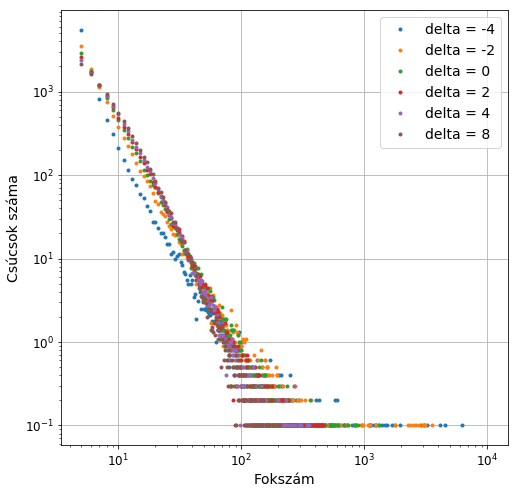

In [43]:
pa_m4 = getDistMean(path + '/degreeDist_10000_5_10_-4.txt') 
pa_m2 = getDistMean(path + '/degreeDist_10000_5_10_-2.txt') 
pa_0 = getDistMean(path + '/degreeDist_10000_5_10_0.txt') 
pa_p2 = getDistMean(path + '/degreeDist_10000_5_10_2.txt')
pa_p4 = getDistMean(path + '/degreeDist_10000_5_10_4.txt')
pa_p8 = getDistMean(path + '/degreeDist_10000_5_10_8.txt')

plt.figure(figsize=(8,8))
sz = 6
plt.loglog(range(10000)[5:],pa_m4[5:],'.',label='delta = -4',markersize=sz)
plt.loglog(range(10000)[5:],pa_m2[5:],'.',label='delta = -2',markersize=sz)
plt.loglog(range(10000)[5:],pa_0[5:],'.',label='delta = 0',markersize=sz)
plt.loglog(range(10000)[5:],pa_p2[5:],'.',label='delta = 2',markersize=sz)
plt.loglog(range(10000)[5:],pa_p4[5:],'.',label='delta = 4',markersize=sz)
plt.loglog(range(10000)[5:],pa_p8[5:],'.',label='delta = 8',markersize=sz)


plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("Csúcsok száma",fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.loglog(range(10000)[5:],distMean_050[5:],'.',label='r = 0.50',markersize=sz)

plt.legend(loc='best',fontsize=14)

plt.grid(True)
plt.show()





### Példa PA modell fokszámeloszlására, az elméleti eloszlásokat is ábrázolva



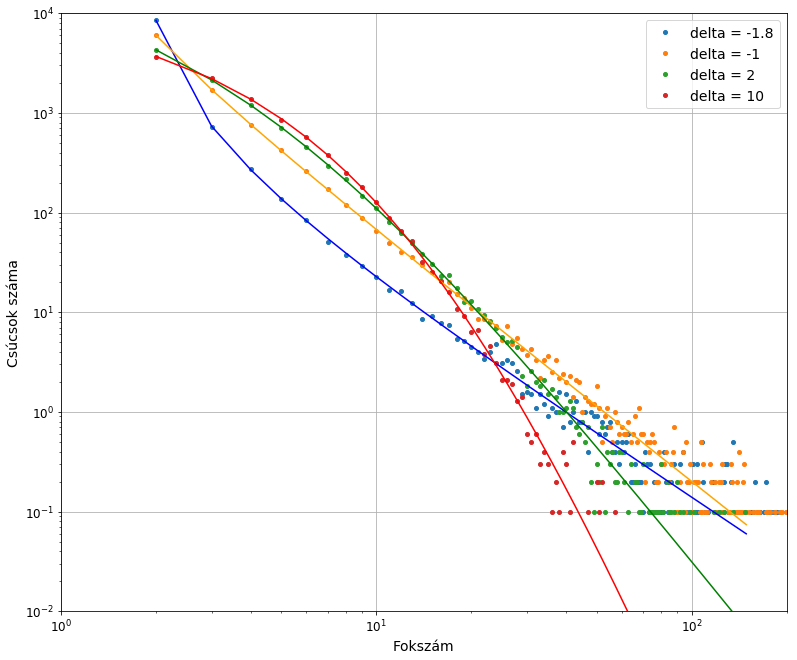

In [21]:
pa_m18 = getDistMean(path + '/degreeDist_10000_2_10_-1.8.txt') 
pa_m1 = getDistMean(path + '/degreeDist_10000_2_10_-1.txt') 
pa_p2 = getDistMean(path + '/degreeDist_10000_2_10_2.txt') 
pa_p10 = getDistMean(path + '/degreeDist_10000_2_10_10.txt') 
plt.figure(figsize=(13,11))
sz = 8
plt.loglog(range(10000)[2:],pa_m18[2:],'.',label='delta = -1.8',markersize=sz)
plt.loglog(range(10000)[2:],pa_m1[2:],'.',label='delta = -1',markersize=sz)
plt.loglog(range(10000)[2:],pa_p2[2:],'.',label='delta = 2',markersize=sz)
plt.loglog(range(10000)[2:],pa_p10[2:],'.',label='delta = 10',markersize=sz)


p1 = getElmeletiDist(10000,2,-1)
p2 = getElmeletiDist(10000,2,2)
p3 = getElmeletiDist(10000,2,10)
p4 = getElmeletiDist(10000,2,-1.8)

plt.loglog(range(2,150),p4,color='b')
plt.loglog(range(2,150),p1,color='orange')
plt.loglog(range(2,150),p2,color='g')
plt.loglog(range(2,150),p3,color='red')

plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("Csúcsok száma",fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.loglog(range(10000)[5:],distMean_050[5:],'.',label='r = 0.50',markersize=sz)

plt.legend(loc='best',fontsize=14)

plt.xlim(1,200)
plt.ylim(0.01,10000)

plt.grid(True)
plt.show()





### Klaszterezettségi együttható viselkedése a GPA modellben (F=F2)


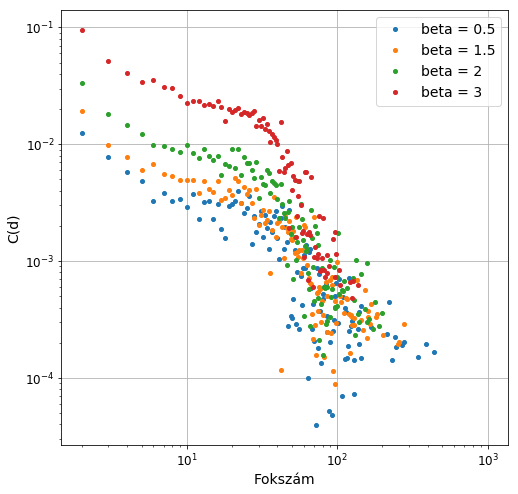

In [135]:
cd_05 = getDistMeanFloat(path + '/GPA2/CdClust_5000_2_0.5_0_0.txt') 
cd_15 = getDistMeanFloat(path + '/GPA2/CdClust_5000_2_1.5_0_0.txt') 
cd_2 = getDistMeanFloat(path  + '/GPA2/CdClust_5000_2_2_0_0.txt') 
cd_3 = getDistMeanFloat(path +  '/GPA2/CdClust_5000_2_3_0_0.txt') 

plt.figure(figsize=(8,8))
sz = 8
plt.loglog(range(1000)[2:],cd_05[2:1000],'.',label='beta = 0.5',markersize=sz)
plt.loglog(range(1000)[2:],cd_15[2:1000],'.',label='beta = 1.5',markersize=sz)
plt.loglog(range(1000)[2:],cd_2[2:1000],'.',label='beta = 2',markersize=sz)
plt.loglog(range(1000)[2:],cd_3[2:1000],'.',label='beta = 3',markersize=sz)



plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("C(d)",fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(loc='best',fontsize=14)


plt.grid(True)
plt.show()

### A GPA modellben beta paraméter szerepének ábrázolása  az F=F2 esetben

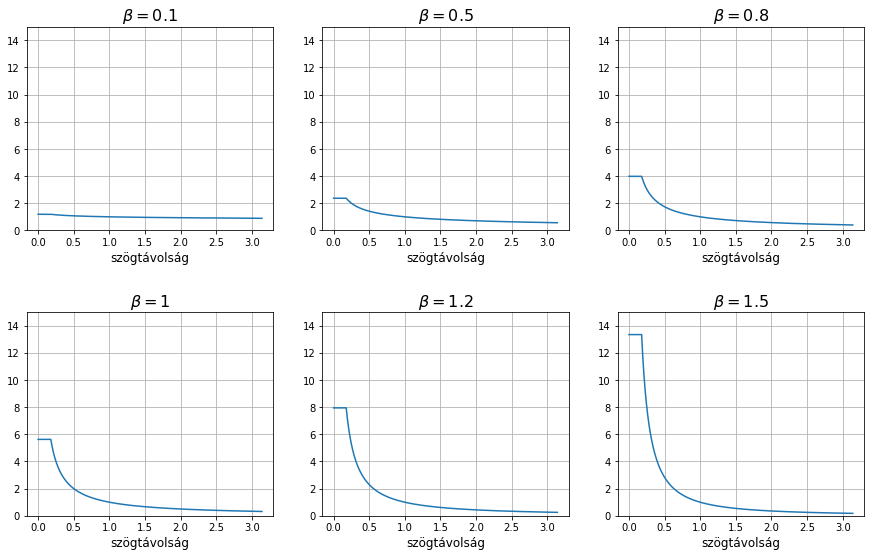

5.987675976373437
5.98354261401648


In [26]:

plt.figure(figsize=(15,9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
n=1000
teta = 0.25
x = np.linspace(0.00001,math.pi,10000)
xcopy =copy.deepcopy(x)
x[x<n**-teta] = n**-teta

betas = [0.1,0.5,0.8,1,1.2,1.5]
for i in range(6):
    beta = betas[i]
    y= [x[i]**(-beta) for i in range(len(x))]
    plt.subplot(2, 3, i+1)
    plt.title(r'$\beta=$'+str(betas[i]),size=16)
    plt.xlabel("szögtávolság",size=12)
    plt.plot(xcopy,y)
    plt.grid(True)
    plt.ylim(0,15)
    
plt.show()

int_down=0
int_up =0
for i in range(len(x)-1):
    int_down += y[i]*(xcopy[i+1]-xcopy[i])
    int_up +=y[i+1]*(xcopy[i+1]-xcopy[i])
print(int_down)
print(int_up)

In [65]:
globClust_10 = getData('E:/egyetem/msc szakdoga/szimulaciok/globalClust_5000_2_1_0.txt')
globClust_01 = getData('E:/egyetem/msc szakdoga/szimulaciok/globalClust_5000_2_0.1_0.txt')
globClust_025 = getData('E:/egyetem/msc szakdoga/szimulaciok/globalClust_5000_2_0.25_0.txt')
globClust_05 = getData('E:/egyetem/msc szakdoga/szimulaciok/globalClust_5000_2_0.5_0.txt')

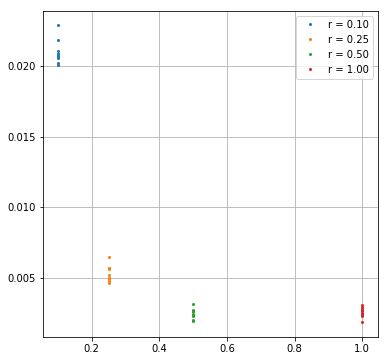

In [62]:
plt.figure(figsize=(6,6))


plt.plot([0.1]*10, globClust_01,'.', label='r = 0.10',markersize=4)
plt.plot([0.25]*10, globClust_025,'.', label='r = 0.25',markersize=4)
plt.plot([0.5]*10, globClust_05,'.', label='r = 0.50',markersize=4)
plt.plot([1.0]*10, globClust_10,'.', label='r = 1.00',markersize=4)
plt.legend(loc='best')

plt.grid(True)
plt.show()

### C(d) a PA modellben különböző delta mellett

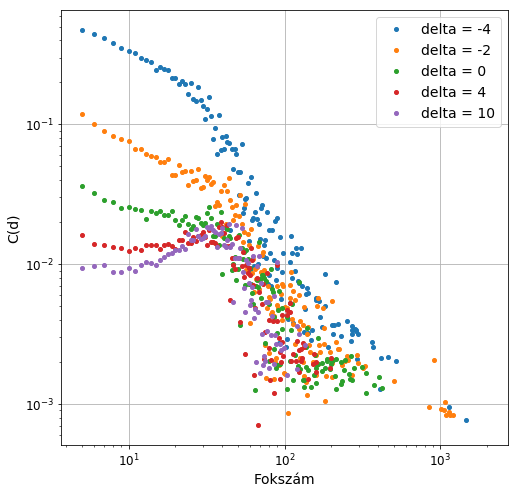

In [161]:
cd__4 = getDistMeanFloat(path + '/PA_CdClustFile_2000_5_-4_.txt') 
cd_2 = getDistMeanFloat(path + '/PA_CdClustFile_2000_5_-2_.txt') 
cd_0 = getDistMeanFloat(path  + '/PA_CdClustFile_2000_5_0_.txt') 
cd_4 = getDistMeanFloat(path +  '/PA_CdClustFile_2000_5_4_.txt') 
cd_10 = getDistMeanFloat(path +  '/PA_CdClustFile_2000_5_10_.txt') 
plt.figure(figsize=(8,8))
sz = 8
plt.loglog(range(2000)[5:],cd__4[5:2000],'.',label='delta = -4',markersize=sz)
plt.loglog(range(2000)[5:],cd_2[5:2000],'.',label='delta = -2',markersize=sz)
plt.loglog(range(2000)[5:],cd_0[5:2000],'.',label='delta = 0',markersize=sz)
plt.loglog(range(2000)[5:],cd_4[5:2000],'.',label='delta = 4',markersize=sz)
plt.loglog(range(2000)[5:],cd_10[5:2000],'.',label='delta = 10',markersize=sz)



plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("C(d)",fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(loc='best',fontsize=14)


plt.grid(True)
plt.show()

### Fokszámeloszlás HPA modellben beta válzotatásával

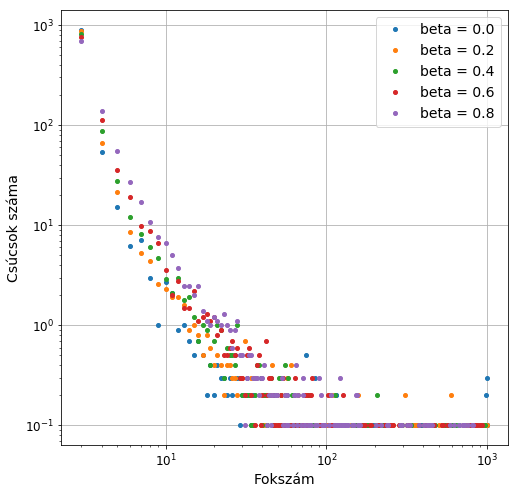

In [156]:
deg_00 = getDistMean(path + '/HPA_degreeDist_1000_3_0_1_.txt') 
deg_02 = getDistMean(path + '/HPA_degreeDist_1000_3_0.2_1_.txt') 
deg_04 = getDistMean(path + '/HPA_degreeDist_1000_3_0.4_1_.txt') 
deg_06 = getDistMean(path  + '/HPA_degreeDist_1000_3_0.6_1_.txt') 
deg_08 = getDistMean(path +  '/HPA_degreeDist_1000_3_0.8_1_.txt') 


plt.figure(figsize=(8,8))
sz = 8
plt.loglog(range(1000)[3:],deg_00[3:1000],'.',label='beta = 0.0',markersize=sz)
plt.loglog(range(1000)[3:],deg_02[3:1000],'.',label='beta = 0.2',markersize=sz)
plt.loglog(range(1000)[3:],deg_04[3:1000],'.',label='beta = 0.4',markersize=sz)
plt.loglog(range(1000)[3:],deg_06[3:1000],'.',label='beta = 0.6',markersize=sz)
plt.loglog(range(1000)[3:],deg_08[3:1000],'.',label='beta = 0.8',markersize=sz)



plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("Csúcsok száma",fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.ylim(0.01,1000)
plt.legend(loc='best',fontsize=14)


plt.grid(True)
plt.show()

### Fokszámeloszlás HPA modellben delta válzotatásával

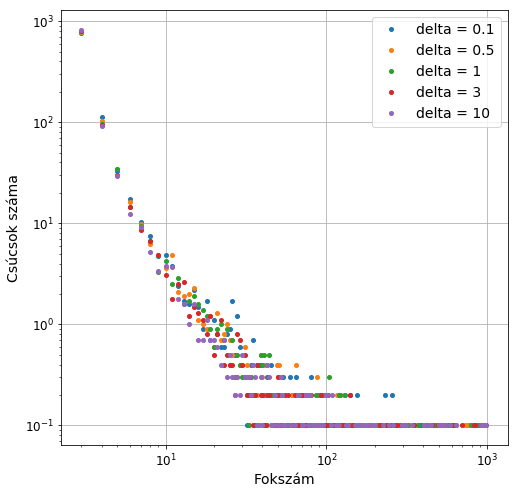

In [144]:
deg_01 = getDistMean(path + '/HPA_degreeDist_1000_3_0.5_0.1_.txt') 
deg_05 = getDistMean(path + '/HPA_degreeDist_1000_3_0.5_0.5_.txt') 
deg_1 = getDistMean(path  + '/HPA_degreeDist_1000_3_0.5_1_.txt') 
deg_3 = getDistMean(path +  '/HPA_degreeDist_1000_3_0.5_3_.txt') 
deg_10 = getDistMean(path +  '/HPA_degreeDist_1000_3_0.5_10_.txt') 

plt.figure(figsize=(8,8))
sz = 8
plt.loglog(range(1000)[3:],deg_01[3:1000],'.',label='delta = 0.1',markersize=sz)
plt.loglog(range(1000)[3:],deg_05[3:1000],'.',label='delta = 0.5',markersize=sz)
plt.loglog(range(1000)[3:],deg_1[3:1000],'.',label='delta = 1',markersize=sz)
plt.loglog(range(1000)[3:],deg_3[3:1000],'.',label='delta = 3',markersize=sz)
plt.loglog(range(1000)[3:],deg_10[3:1000],'.',label='delta = 10',markersize=sz)


plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("Csúcsok száma",fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(loc='best',fontsize=14)


plt.grid(True)
plt.show()

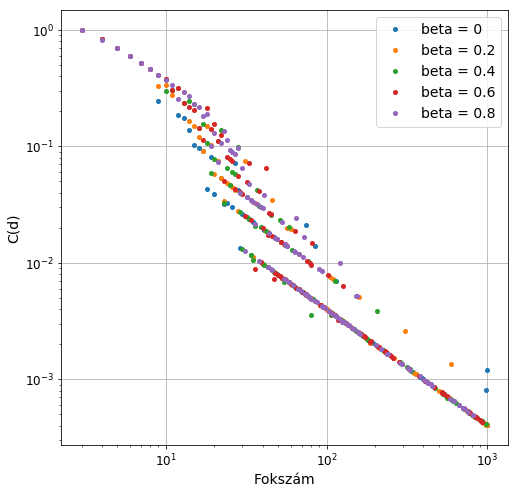

In [158]:
cd_00 = getDistMeanFloat(path + '/HPA_CdClustFile_1000_3_0_1_.txt') 
cd_02 = getDistMeanFloat(path + '/HPA_CdClustFile_1000_3_0.2_1_.txt') 
cd_04 = getDistMeanFloat(path  + '/HPA_CdClustFile_1000_3_0.4_1_.txt') 
cd_06 = getDistMeanFloat(path +  '/HPA_CdClustFile_1000_3_0.6_1_.txt') 
cd_08 = getDistMeanFloat(path +  '/HPA_CdClustFile_1000_3_0.8_1_.txt') 

plt.figure(figsize=(8,8))
sz = 8
plt.loglog(range(1000)[3:],cd_00[3:1000],'.',label='beta = 0',markersize=sz)
plt.loglog(range(1000)[3:],cd_02[3:1000],'.',label='beta = 0.2',markersize=sz)
plt.loglog(range(1000)[3:],cd_04[3:1000],'.',label='beta = 0.4',markersize=sz)
plt.loglog(range(1000)[3:],cd_06[3:1000],'.',label='beta = 0.6',markersize=sz)
plt.loglog(range(1000)[3:],cd_08[3:1000],'.',label='beta = 0.8',markersize=sz)



plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("C(d)",fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(loc='best',fontsize=14)


plt.grid(True)
plt.show()

### C(d) mennyiség alakulása a HPA modellben 

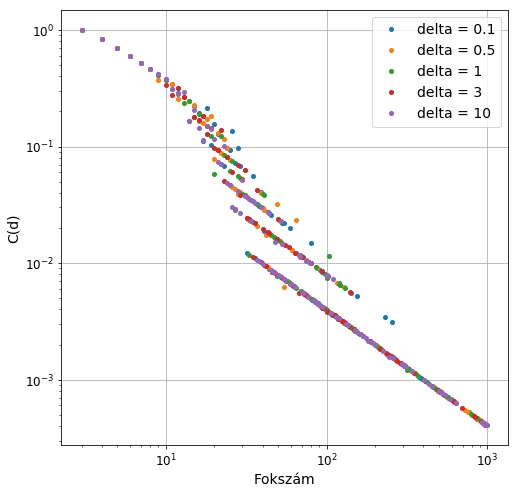

In [143]:
cd_01 = getDistMeanFloat(path + '/HPA_CdClustFile_1000_3_0.5_0.1_.txt') 
cd_05 = getDistMeanFloat(path + '/HPA_CdClustFile_1000_3_0.5_0.5_.txt') 
cd_1 = getDistMeanFloat(path  + '/HPA_CdClustFile_1000_3_0.5_1_.txt') 
cd_3 = getDistMeanFloat(path +  '/HPA_CdClustFile_1000_3_0.5_3_.txt') 
cd_10 = getDistMeanFloat(path +  '/HPA_CdClustFile_1000_3_0.5_10_.txt') 

plt.figure(figsize=(8,8))
sz = 8
plt.loglog(range(1000)[3:],cd_01[3:1000],'.',label='delta = 0.1',markersize=sz)
plt.loglog(range(1000)[3:],cd_05[3:1000],'.',label='delta = 0.5',markersize=sz)
plt.loglog(range(1000)[3:],cd_1[3:1000],'.',label='delta = 1',markersize=sz)
plt.loglog(range(1000)[3:],cd_3[3:1000],'.',label='delta = 3',markersize=sz)
plt.loglog(range(1000)[3:],cd_10[3:1000],'.',label='delta = 10',markersize=sz)


plt.xlabel("Fokszám",fontsize=14)
plt.ylabel("C(d)",fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(loc='best',fontsize=14)


plt.grid(True)
plt.show()

### HPA gráfok megjelenítése

E:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


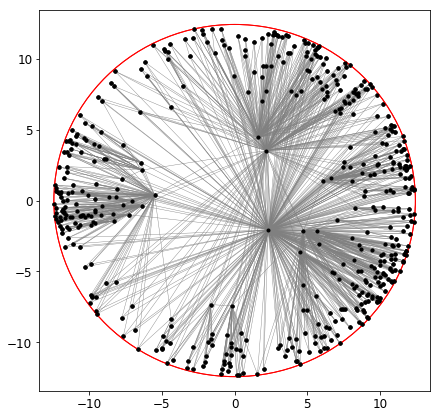

In [134]:
with open(path + '/HPAgraph_500_3_0.75_1.txt') as f:
    lines = f.read().splitlines()
    
n=500
beta = 0.75

r_t = 2 * np.log(n+1)
points = []

for i in range(n):
    p = list(map(float,lines[i].split()))
    long = 2 *beta*np.log(p[0]) + (1-beta) * r_t
    ang = p[1]
    x = long * np.cos(ang)
    y = long * np.sin(ang)
    points.append([x,y])
    
edges = []
for i in range(n):
    actlist = list(map(int,lines[n+i].split()))
    for j in range(len(actlist)):
        if actlist[j]<i:
            edges.append([i,actlist[j]])

# plotting the graph


fig, ax = plt.subplots(figsize=(7,7))
circle = plt.Circle((0,0), r_t, color='red', fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle)
ax.set_xlim([-r_t-1, r_t+1])
ax.set_ylim([-r_t-1, r_t+1])
ax.add_artist(circle)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
for i in range(n):
    ax.scatter(points[i][0],points[i][1],s=12,color="black")    
for i in range(len(edges)):
    u = edges[i][0]
    v = edges[i][1]
    ax.plot([points[u][0],points[v][0]],[points[u][1],points[v][1]],color='grey',linewidth=0.4)
for i in range(n):
    ax.plot(points[i][0],points[i][1],'.',markersize=6,color="black")    
fig.show()

    


In [33]:
def generatePointOnSphere():
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    z = np.random.uniform(-1,1)
    l = (x*x+y*y+z*z)**0.5 
    if l< 1:
        scalar = 1/l
        return [x*scalar,y*scalar,z*scalar]
    else: return generatePointOnSphere()
    
def distCirc(u,v):
    z = (u[0]*v[0]+u[1]*v[1]+u[2]*v[2])/(u[0]*u[0]+u[1]*u[1]+u[2]*u[2])**0.5/(v[0]*v[0]+v[1]*v[1]+v[2]*v[2])**0.5
    return np.arccos(z)     

### GPA gráfok megjelenítése F = F2 választás mellett

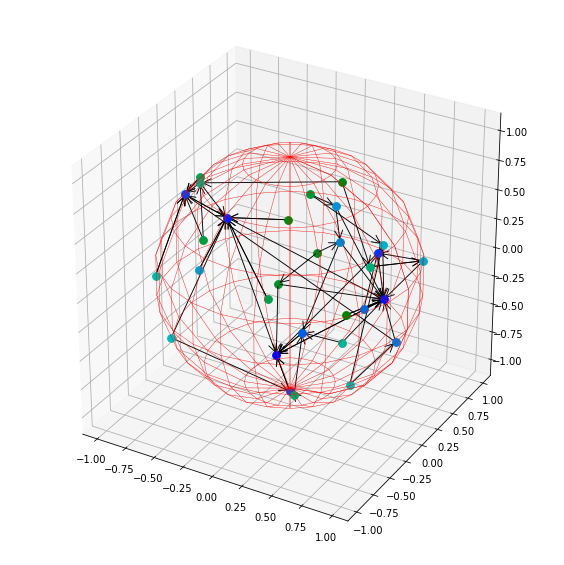

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
from colour import Color

with open(path + '/graphs/graph30_4.txt') as f:
    lines = f.read().splitlines()

    
points = []
n= 30
for i in range(n):
    p = list(map(float,lines[i].split()))
    l = (p[0]**2+p[1]**2+p[2]**2)**0.5

    points.append([p[0]/l,p[1]/l,p[2]/l])
    
edges = []
for i in range(n):
    actl = list(map(int,lines[n+i].split()))
    for j in range(len(actl)):
        if actl[j]<i:
            edges.append([i,actl[j]])
lens = []
for i in range(len(edges)):
    lens.append(distCirc(points[edges[i][0]],points[edges[i][1]]))

    

    
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw sphere
u, v = np.mgrid[0:2*np.pi:25j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r",linewidth=0.4)

# draw a point
P=[]

#red = Color("blue")
#colors = list(red.range_to(Color("green"),20))
#for i in range(20):
#    p = generatePointOnSphere()
#    ax.scatter(p[0], p[1], p[2], color=str(colors[i]), s=40)
#    P.append(p)


# draw points
red = Color("blue")
colors = list(red.range_to(Color("green"),len(points)))
for i in range(len(points)):
    ax.scatter(points[i][0], points[i][1], points[i][2], color=str(colors[i]), s=60)
    



# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
        
for i in range(len(edges)):
    u = points[edges[i][0]]
    v = points[edges[i][1]]
    a = Arrow3D([u[0], v[0]],[u[1], v[1]], [u[2], v[2]], mutation_scale=20,lw=0.9, arrowstyle="->", color="k")
    ax.add_artist(a)
plt.show()

### illetve az adott gráfban a élek távolságai

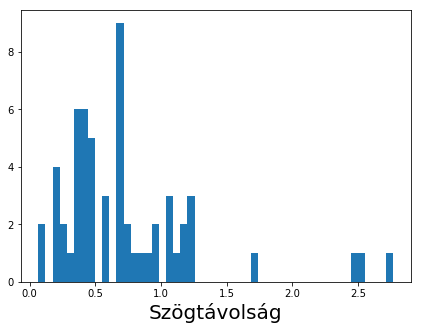

In [36]:
plt.figure(figsize=(7,5))
#plt.title(r'$\beta=$ 4',fontsize=20)
plt.xlabel("Szögtávolság",fontsize=20)
plt.hist(lens,bins=50)
plt.show()